# **ML Lab 02 task 04**

In [1]:
import pandas as pd
import numpy as np
import random

In [7]:
n = 100
data = pd.DataFrame(
    {
        'Age': np.random.randint(18, 25, n),
        'Gender': np.random.choice(['Male', 'Female'], n),
        'Hours_studied': np.random.randint(0, 10, n),
        'Attendance': np.random.randint(50, 100, n),
        'Family_income': np.random.choice(['Low', 'Medium', 'High'], n),
        'Internet': np.random.choice(['Yes', 'No'], n),
        'Part_time_job': np.random.choice(['Yes', 'No'], ),
        'sleep_hours': np.random.randint(4, 10, n),
        'Extracirricular': np.random.choice(['Yes', 'No'], n),
        'Stress_level': np.random.randint(1, 6, n),
        'Performance': np.random.choice(['Low', 'Medium', 'High'], n)
    }
)
data

,Age,Gender,Hours_studied,Attendance,Family_income,Internet,Part_time_job,sleep_hours,Extracirricular,Stress_level,Performance
0,21,Male,8,72,Medium,Yes,No,9,Yes,5,Medium
1,22,Male,2,65,Low,Yes,No,8,Yes,5,Medium
2,21,Male,2,93,Medium,No,No,6,No,1,Low
3,20,Male,0,54,Low,Yes,No,9,Yes,2,High
4,23,Male,6,70,High,Yes,No,9,No,1,High
...,...,...,...,...,...,...,...,...,...,...,...
95,19,Female,9,60,High,Yes,No,5,No,3,Medium
96,24,Male,2,71,High,No,No,5,Yes,3,Low
97,21,Male,6,71,High,Yes,No,6,Yes,2,Low
98,22,Male,6,64,Low,No,No,4,Yes,1,Low


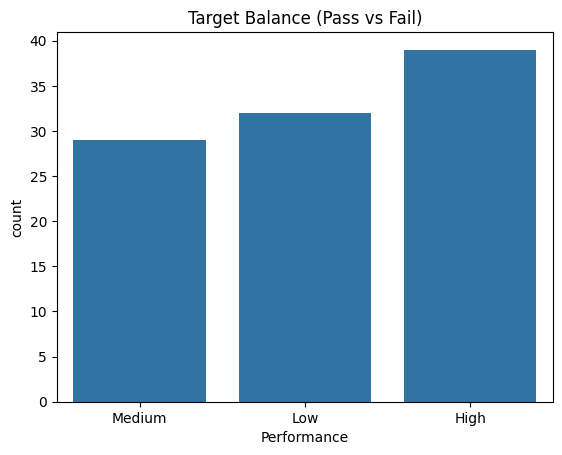

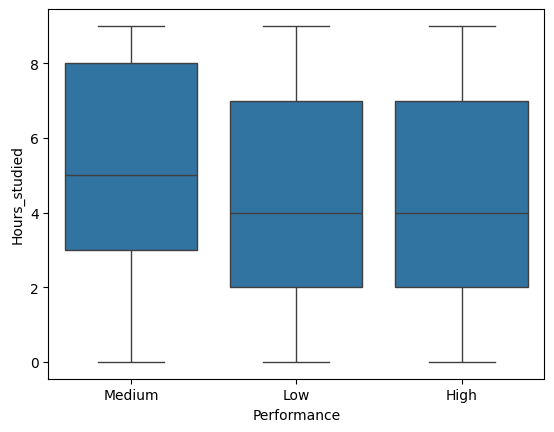

In [9]:
data.describe()
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Performance", data=data)
plt.title("Target Balance (Pass vs Fail)")
plt.show()

# Relationship between Hours Studied and Performance
sns.boxplot(x="Performance", y="Hours_studied", data=data)
plt.show()

In [10]:
print(data.isnull().sum())

Age                0
Gender             0
Hours_studied      0
Attendance         0
Family_income      0
Internet           0
Part_time_job      0
sleep_hours        0
Extracirricular    0
Stress_level       0
Performance        0
dtype: int64


In [12]:
data.loc[random.sample(range(n), 5), 'sleep_hours'] = np.nan
print(data.isnull().sum())

data["sleep_hours"] = data["sleep_hours"].fillna(data["sleep_hours"].mean())
print(data.isnull().sum())

Age                 0
Gender              0
Hours_studied       0
Attendance          0
Family_income       0
Internet            0
Part_time_job       0
sleep_hours        10
Extracirricular     0
Stress_level        0
Performance         0
dtype: int64
Age                0
Gender             0
Hours_studied      0
Attendance         0
Family_income      0
Internet           0
Part_time_job      0
sleep_hours        0
Extracirricular    0
Stress_level       0
Performance        0
dtype: int64


In [14]:
# the dataset is balanced but for the sake of demo
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(data.drop('Performance', axis=1), data['Performance'])
data
data_over = pd.DataFrame(X_resampled, columns = X_resampled.columns)
data_over["Performance"]=y_resampled
data_over

,Age,Gender,Hours_studied,Attendance,Family_income,Internet,Part_time_job,sleep_hours,Extracirricular,Stress_level,Performance
0,21,Male,8,72,Medium,Yes,No,9.000000,Yes,5,Medium
1,22,Male,2,65,Low,Yes,No,6.355556,Yes,5,Medium
2,21,Male,2,93,Medium,No,No,6.000000,No,1,Low
3,20,Male,0,54,Low,Yes,No,9.000000,Yes,2,High
4,23,Male,6,70,High,Yes,No,9.000000,No,1,High
...,...,...,...,...,...,...,...,...,...,...,...
112,23,Female,9,56,Low,No,No,7.000000,No,2,Medium
113,23,Female,9,56,Low,No,No,7.000000,No,2,Medium
114,19,Female,4,83,Low,No,No,9.000000,Yes,4,Medium
115,19,Female,2,72,Low,Yes,No,7.000000,Yes,4,Medium


In [19]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Separate features and target
X = data.drop("Performance", axis=1)
y = data["Performance"]

# Encode categorical columns (so MI can handle them)
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Mutual Information scores
mi_scores = mutual_info_classif(X_encoded, y, random_state=42)

# Convert to DataFrame
mi_df = pd.DataFrame(mi_scores, index=X_encoded.columns, columns=["MI Score"])
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

print("Top features by Mutual Information:")
print(mi_df.head(2))


Top features by Mutual Information:
               MI Score
Age            0.115797
Family_income  0.111770


In [20]:
data_dummy = pd.get_dummies(data=data_over, drop_first=True)
data_dummy

,Age,Hours_studied,Attendance,sleep_hours,Stress_level,Gender_Male,Family_income_Low,Family_income_Medium,Internet_Yes,Extracirricular_Yes,Performance_Low,Performance_Medium
0,21,8,72,9.000000,5,True,False,True,True,True,False,True
1,22,2,65,6.355556,5,True,True,False,True,True,False,True
2,21,2,93,6.000000,1,True,False,True,False,False,True,False
3,20,0,54,9.000000,2,True,True,False,True,True,False,False
4,23,6,70,9.000000,1,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
112,23,9,56,7.000000,2,False,True,False,False,False,False,True
113,23,9,56,7.000000,2,False,True,False,False,False,False,True
114,19,4,83,9.000000,4,False,True,False,False,True,False,True
115,19,2,72,7.000000,4,False,True,False,True,True,False,True


One-Hot: Creates a column for every category (Gender_Male, Gender_Female).

Dummy: Drops one category to avoid multicollinearity (if Gender_Male = 1, then Gender_Female is automatically 0).

In [21]:
duplicates = data.duplicated()
print(duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


In [23]:
data_cleaned = data.drop_duplicates()
data_cleaned

data_cleaned2 = data.drop_duplicates(subset=['Age', 'Gender'])
data_cleaned2

,Age,Gender,Hours_studied,Attendance,Family_income,Internet,Part_time_job,sleep_hours,Extracirricular,Stress_level,Performance
0,21,Male,8,72,Medium,Yes,No,9.000000,Yes,5,Medium
1,22,Male,2,65,Low,Yes,No,6.355556,Yes,5,Medium
3,20,Male,0,54,Low,Yes,No,9.000000,Yes,2,High
4,23,Male,6,70,High,Yes,No,9.000000,No,1,High
5,19,Female,2,70,High,No,No,5.000000,No,1,Low
9,22,Female,2,51,Medium,Yes,No,8.000000,Yes,5,Low
10,18,Female,3,74,High,No,No,6.000000,No,2,Low
11,19,Male,1,97,High,No,No,7.000000,Yes,2,High
12,24,Female,8,71,Medium,No,No,4.000000,No,5,Medium
13,24,Male,7,98,Medium,Yes,No,4.000000,Yes,1,High
